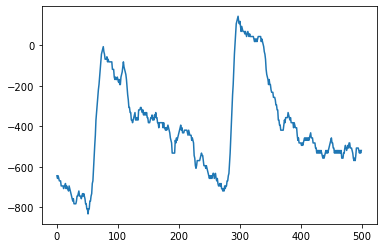

15576


In [1]:
import numpy as np
import scipy.signal

from matplotlib import pyplot as plt

L = np.array([2.762, 2.762, 1.508, 2.758, 2.765, 2.765, 2.761, 1.507, 2.757, 2.757, 2.764, 2.764, 1.512, 2.76, 2.766, 2.766, 2.763, 1.51, 2.759, 2.759, 2.765, 2.765, 1.514, 2.761, 2.758, 2.758, 2.764, 1.513, 2.76, 2.76, 2.757, 2.757, 1.508, 2.763, 2.759, 2.759, 2.766, 1.517, 4.012])

L = []
with open('./test_data/pulse_5.txt', 'rb') as f:
    lines = f.readlines()
    for line in lines[2:]:
        L.append(float(line))
L = np.asarray(L)

# L = np.round(L, 1)
# Remove DC component, as proposed by Nils Werner
L -= np.mean(L)
# Window signal
#L *= scipy.signal.windows.hann(len(L))

plt.figure()
plt.plot(L[:500])
plt.show()

print(L.size)

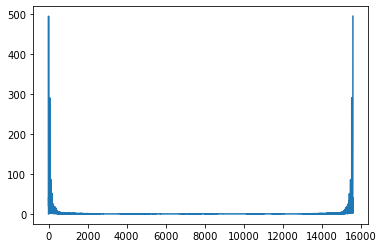

<ipython-input-2-1d16597e1a72>:13: RuntimeWarning: divide by zero encountered in double_scalars
  Tn = int(1 / fn * fs)


OverflowError: cannot convert float infinity to integer

In [2]:
from scipy.fftpack import fft

fft_result = fft(L)
yf = abs(fft_result) / (0.5 * len(fft_result))

plt.figure()
plt.plot(yf)
plt.show()

fs = 1000
length = len(L)
fn = np.argmax(yf[1:int(length/2)]) / len(yf[1:]) * fs
Tn = int(1 / fn * fs)

print(Tn)

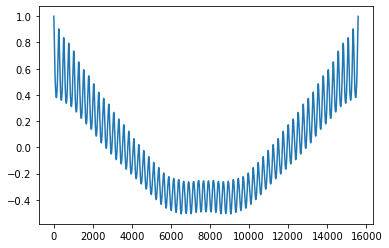

7789


In [3]:
fft = np.fft.rfft(L, norm="ortho")
# fft = np.fft.rfft(fft, norm="ortho")

def abs2(x):
    return x.real**2 + x.imag**2

selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
# plt.savefig('first.jpg')
plt.show()

print(fft.size)


In [4]:
# let's get a max, assuming a least 4 periods...
multipleofperiod=np.argmax(selfconvol[1:int(len(L)/4)])
Ltrunk=L[0:(len(L)//multipleofperiod)*multipleofperiod]

fft = np.fft.rfft(Ltrunk, norm="ortho")
selfconvol=np.fft.irfft(abs2(fft), norm="ortho")
selfconvol=selfconvol/selfconvol[0]

plt.figure()
plt.plot(selfconvol)
# plt.savefig('second.jpg')
plt.show()

print(multipleofperiod)
print(selfconvol)


<ipython-input-4-237d5dc12bbc>:3: RuntimeWarning: divide by zero encountered in long_scalars
  Ltrunk=L[0:(len(L)//multipleofperiod)*multipleofperiod]


ValueError: Invalid number of FFT data points (0) specified.

In [7]:
#get ranges for first min, second max
fmax=np.max(selfconvol[1:int(len(Ltrunk)/4)])
fmin=np.min(selfconvol[1:int(len(Ltrunk)/4)])
xstartmin=1
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

xstartmax=xstartmin
while selfconvol[xstartmax]<fmin+0.7*(fmax-fmin) and xstartmax< len(Ltrunk)//4:
    xstartmax=xstartmax+1

xstartmin=xstartmax
while selfconvol[xstartmin]>fmin+0.2*(fmax-fmin) and xstartmin< len(Ltrunk)//4:
    xstartmin=xstartmin+1

period=np.argmax(selfconvol[xstartmax:xstartmin])+xstartmax

print ("The period is ",period)

ValueError: attempt to get argmax of an empty sequence

In [8]:
fs = 1000
length = len(L)
fn = np.argmax(selfconvol[1:int(length/2)]) / len(selfconvol[1:]) * fs
Tn = int(1 / fn * fs)

<ipython-input-8-5f2e3752b9d0>:4: RuntimeWarning: divide by zero encountered in double_scalars
  Tn = int(1 / fn * fs)


OverflowError: cannot convert float infinity to integer